In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
!pip install geemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.4 MB/s 
     |████████████████████████████████| 99 kB 5.7 MB/s 
     |████████████████████████████████| 46 kB 2.0 MB/s 
     |████████████████████████████████| 3.0 MB 31.2 MB/s 
     |████████████████████████████████| 130 kB 39.9 MB/s 
     |████████████████████████████████| 187 kB 48.0 MB/s 
     |████████████████████████████████| 1.3 MB 25.5 MB/s 
     |████████████████████████████████| 3.3 MB 30.6 MB/s 
     |████████████████████████████████| 1.2 MB 8.6 MB/s 
     |████████████████████████████████| 98 kB 7.0 MB/s 
     |████████████████████████████████| 8.8 MB 34.1 MB/s 
     |████████████████████████████████| 95 kB 3.5 MB/s 
     |████████████████████████████████| 128 kB 42.3 MB/s 
     |████████████████████████████████| 342 kB 45.3 MB/s 
     |████████████████████████████████| 428 kB 27.6 MB/s 
     |████████████████████████████████| 5

In [3]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.5 MB/s 
     |████████████████████████████████| 6.3 MB 45.9 MB/s 
     |████████████████████████████████| 16.7 MB 41.3 MB/s 


In [4]:
import os
import geemap
import pandas as pd
import geopandas as gpd

In [5]:
geemap.update_package()

Unzipping geemap-master.zip ...
Data downloaded to: /root/Downloads/geemap-master

Please comment out 'geemap.update_package()' and restart the kernel to take effect:
Jupyter menu -> Kernel -> Restart & Clear Output


In [6]:
import matplotlib.pyplot as plt

In [7]:
from shapely.geometry import Polygon, LineString, Point

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
gyeonggi_do = gpd.GeoDataFrame.from_file('/content/drive/Shareddrives/데마 팀플 2/텀프로젝트/용인시 data/TL_KODIS_BAS.shp',encoding='euckr')
df=pd.read_csv('/content/drive/Shareddrives/데마 팀플 2/텀프로젝트/용인시 data/무료급식소좌표_용인시.csv')
df2=pd.read_csv('/content/drive/Shareddrives/데마 팀플 2/텀프로젝트/용인시 data/무료급식소좌표_용인시+최적위치.csv')   #데이터셋 불러오기

In [10]:
df

,시,WGS84위도,WGS84경도
0,용인시,37.240867,127.177969
1,용인시,37.287871,127.111698
2,용인시,37.322224,127.097447


In [11]:
df['WGS84경도'] = df['WGS84경도'].astype(float)
df['WGS84위도'] = df['WGS84위도'].astype(float)
df['geometry'] = df.apply(lambda row : Point([row['WGS84경도'], row['WGS84위도']]), axis=1)
df = gpd.GeoDataFrame(df, geometry='geometry')

df.head()

,시,WGS84위도,WGS84경도,geometry
0,용인시,37.240867,127.177969,POINT (127.17797 37.24087)
1,용인시,37.287871,127.111698,POINT (127.11170 37.28787)
2,용인시,37.322224,127.097447,POINT (127.09745 37.32222)


In [12]:
df2['WGS84경도'] = df2['WGS84경도'].astype(float)
df2['WGS84위도'] = df2['WGS84위도'].astype(float)
df2['geometry'] = df2.apply(lambda row : Point([row['WGS84경도'], row['WGS84위도']]), axis=1)
df2 = gpd.GeoDataFrame(df2, geometry='geometry')

df2.head()

,시,WGS84위도,WGS84경도,geometry
0,기존급식소1,37.240867,127.177969,POINT (127.17797 37.24087)
1,기존급식소2,37.287871,127.111698,POINT (127.11170 37.28787)
2,기존급식소3,37.322224,127.097447,POINT (127.09745 37.32222)
3,최적위치급식소,37.268710,127.149037,POINT (127.14904 37.26871)


In [13]:
df2

,시,WGS84위도,WGS84경도,geometry
0,기존급식소1,37.240867,127.177969,POINT (127.17797 37.24087)
1,기존급식소2,37.287871,127.111698,POINT (127.11170 37.28787)
2,기존급식소3,37.322224,127.097447,POINT (127.09745 37.32222)
3,최적위치급식소,37.268710,127.149037,POINT (127.14904 37.26871)


In [14]:
gyeonggi_do.head()

,BAS_AR,BAS_ID,BAS_MGT_SN,CTP_KOR_NM,MVMN_DE,MVMN_RESN,NTFC_DE,OPERT_DE,SIG_CD,SIG_KOR_NM,geometry
0,0.616,16293,4111000477,경기도,20121221,국가기초구역 최초생성,20121221,20121221000000,41110,수원시,"POLYGON ((957792.821 1923248.053, 957773.566 1..."
1,0.747,16290,4111000478,경기도,20121221,국가기초구역 최초생성,20121221,20121221000000,41110,수원시,"POLYGON ((958316.161 1922421.038, 958294.114 1..."
2,0.373,16278,4111000460,경기도,20121221,국가기초구역 최초생성,20121221,20121221000000,41110,수원시,"POLYGON ((957873.608 1922388.788, 957869.303 1..."
3,0.188,16297,4111000479,경기도,20121221,국가기초구역 최초생성,20121221,20121221000000,41110,수원시,"POLYGON ((956403.226 1923654.735, 956394.744 1..."
4,0.053,16214,4111000419,경기도,20121221,국가기초구역 최초생성,20121221,20121221000000,41110,수원시,"POLYGON ((958316.161 1922421.038, 958317.137 1..."


In [15]:
yongin = gyeonggi_do.loc[gyeonggi_do['SIG_KOR_NM'] == '용인시']

In [16]:
yongin

,BAS_AR,BAS_ID,BAS_MGT_SN,CTP_KOR_NM,MVMN_DE,MVMN_RESN,NTFC_DE,OPERT_DE,SIG_CD,SIG_KOR_NM,geometry
4311,4.107322,16803,4146000291,경기도,None,None,20121221,None,41460,용인시,"POLYGON ((959166.326 1927415.451, 959177.217 1..."
4312,0.089527,16852,4146000216,경기도,None,None,20121221,None,41460,용인시,"POLYGON ((961951.647 1924265.429, 962004.841 1..."
4313,1.592666,16996,4146000099,경기도,None,None,20121221,None,41460,용인시,"POLYGON ((968906.253 1918272.580, 968930.848 1..."
4314,3.067507,17116,4146000017,경기도,None,None,20121221,None,41460,용인시,"POLYGON ((972694.365 1907363.252, 972714.049 1..."
4315,0.925252,17129,4146000029,경기도,None,None,20121221,None,41460,용인시,"POLYGON ((973474.069 1910807.577, 973490.296 1..."
...,...,...,...,...,...,...,...,...,...,...,...
4690,0.234021,17013,4146000101,경기도,None,None,20121221,None,41460,용인시,"POLYGON ((969970.585 1918185.750, 969970.589 1..."
4691,0.278309,16984,4146000335,경기도,None,None,20121221,None,41460,용인시,"POLYGON ((968786.712 1921139.229, 968771.199 1..."
4692,0.790245,17147,4146000365,경기도,None,None,20121221,None,41460,용인시,"POLYGON ((975473.875 1913491.785, 975457.158 1..."
4693,1.229307,17165,4146000033,경기도,None,None,20121221,None,41460,용인시,"POLYGON ((985531.869 1913176.018, 985535.815 1..."


In [17]:
df.set_crs(epsg = 4326, inplace = True)
df2.set_crs(epsg = 4326, inplace = True)
yongin = yongin.to_crs(epsg=4326)

In [18]:
print(df.crs)
print(yongin.crs)

epsg:4326
epsg:4326


In [19]:
yongin

,BAS_AR,BAS_ID,BAS_MGT_SN,CTP_KOR_NM,MVMN_DE,MVMN_RESN,NTFC_DE,OPERT_DE,SIG_CD,SIG_KOR_NM,geometry
4311,4.107322,16803,4146000291,경기도,None,None,20121221,None,41460,용인시,"POLYGON ((127.03898 37.34487, 127.03911 37.344..."
4312,0.089527,16852,4146000216,경기도,None,None,20121221,None,41460,용인시,"POLYGON ((127.07059 37.31659, 127.07119 37.316..."
4313,1.592666,16996,4146000099,경기도,None,None,20121221,None,41460,용인시,"POLYGON ((127.14933 37.26283, 127.14961 37.262..."
4314,3.067507,17116,4146000017,경기도,None,None,20121221,None,41460,용인시,"POLYGON ((127.19245 37.16462, 127.19267 37.164..."
4315,0.925252,17129,4146000029,경기도,None,None,20121221,None,41460,용인시,"POLYGON ((127.20111 37.19569, 127.20129 37.195..."
...,...,...,...,...,...,...,...,...,...,...,...
4690,0.234021,17013,4146000101,경기도,None,None,20121221,None,41460,용인시,"POLYGON ((127.16133 37.26209, 127.16133 37.262..."
4691,0.278309,16984,4146000335,경기도,None,None,20121221,None,41460,용인시,"POLYGON ((127.14786 37.28867, 127.14769 37.288..."
4692,0.790245,17147,4146000365,경기도,None,None,20121221,None,41460,용인시,"POLYGON ((127.22355 37.21994, 127.22337 37.219..."
4693,1.229307,17165,4146000033,경기도,None,None,20121221,None,41460,용인시,"POLYGON ((127.33693 37.21730, 127.33697 37.217..."


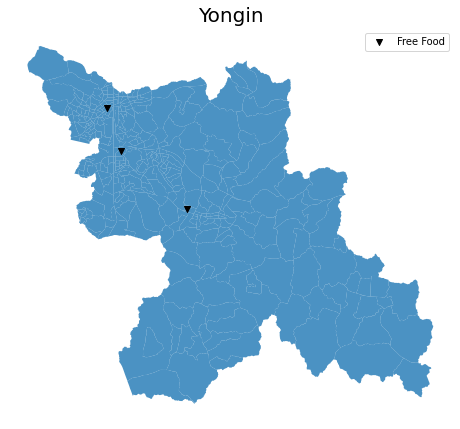

In [20]:
ax = yongin.plot(column="SIG_KOR_NM", figsize=(8,8), alpha=0.8)
df.plot(ax=ax, marker='v', color='black', label='Free Food')
ax.set_title("Yongin", fontsize=20)
ax.set_axis_off()
plt.legend()
plt.show()

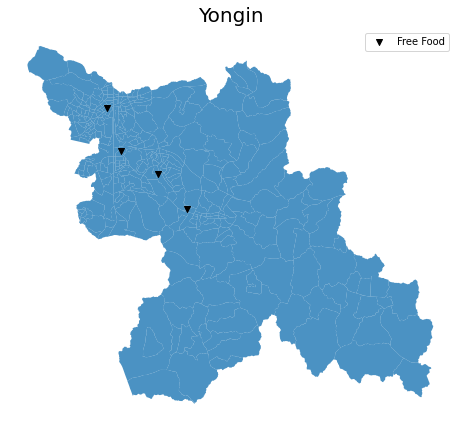

In [21]:
ax = yongin.plot(column="SIG_KOR_NM", figsize=(8,8), alpha=0.8)
df2.plot(ax=ax, marker='v', color='black', label='Free Food')
ax.set_title("Yongin", fontsize=20)
ax.set_axis_off()
plt.legend()
plt.show()